In [55]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Loads the MNIST dataset and print out shapes of data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizes the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Encodes labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print('Training Data Shape: ', x_train.shape, y_train.shape)
print('Test Data Shape: ', x_test.shape, y_test.shape)


Training Data Shape:  (60000, 28, 28) (60000, 10)
Test Data Shape:  (10000, 28, 28) (10000, 10)


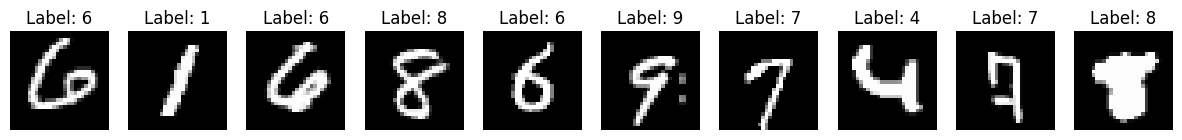

In [ ]:
from random import sample
import matplotlib.pyplot as plt

# Selects 10 random images from the training data.
indices = sample(range(len(x_train)), 10)
images = [x_train[i] for i in indices]

# Plots the selected images.
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i, img in enumerate(images):
    axes[i].set_title('Label: ' + str(y_train[indices[i]].argmax(axis=0)))
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam

# Creates CNN model with Conv2D, MaxPooling2D, Flatten, and Dense layers.
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'],)

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Trains the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7704 - loss: 0.6895
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9492 - loss: 0.1733
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9614 - loss: 0.1282
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9648 - loss: 0.1167
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9704 - loss: 0.0990


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predicts the test data.
y_h = model.predict(x_test)

# Prints the metrics.
y_test_labels = y_test.argmax(axis=1)
y_h_labels = y_h.argmax(axis=1)

print('Accuracy:', accuracy_score(y_test_labels, y_h_labels))
print('Precision:', precision_score(y_test_labels, y_h_labels, average='macro'))
print('Recall:', recall_score(y_test_labels, y_h_labels, average='macro'))
print('F1 Score:', f1_score(y_test_labels, y_h_labels, average='macro'))
print('Confusion Matrix:\n', confusion_matrix(y_test_labels, y_h_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9882
Precision: 0.9880665012877573
Recall: 0.9881637726268707
F1 Score: 0.9880895408699175
Confusion Matrix:
 [[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1129    2    1    0    1    1    1    0    0]
 [   1    0 1028    0    0    0    0    3    0    0]
 [   0    0    1 1000    0    5    0    2    1    1]
 [   0    0    0    0  968    0    5    0    0    9]
 [   0    0    0    2    0  887    1    1    1    0]
 [   3    2    0    0    1    4  948    0    0    0]
 [   0    2   11    0    0    0    0 1012    1    2]
 [   6    0    4    2    1    2    0    2  951    6]
 [   5    0    0    1    5    8    0    5    3  982]]


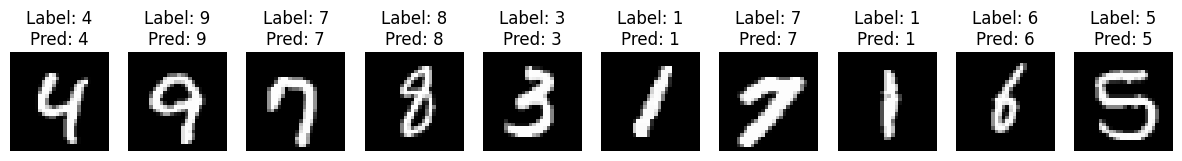

In [ ]:
# Selects 10 random images from the test data.
indices = sample(range(len(x_test)), 10)
images = [x_test[i] for i in indices]

# Plots the selected images.
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i, img in enumerate(images):
    axes[i].set_title('Label: ' + str(y_test[indices[i]].argmax(axis=0)) + '\nPred: ' + str(y_h[indices[i]].argmax(axis=0)))
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')

In [ ]:
# Saves the model.
model.save('model.keras')